# Forecast coal consumption
- Time series AUTO Arima for forecasting
- Time series as regression of lag values

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('Coal Consumption.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          132 non-null    object 
 1   Amount         132 non-null    float64
 2   Extract_month  132 non-null    int64  
 3   Extract Year   132 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.2+ KB


In [65]:
df.head()

,Month,Amount,Extract_month,Extract Year
0,1/1/1990,16.50,1,1990
1,2/1/1990,15.17,2,1990
2,3/1/1990,12.75,3,1990
3,4/1/1990,12.31,4,1990
4,5/1/1990,8.34,5,1990


In [66]:
df = pd.read_csv('Coal Consumption.csv',parse_dates=['Month'])
# convert object data type of date column to datetime64[ns]
# Date format is MM-DD-YYYY

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          132 non-null    datetime64[ns]
 1   Amount         132 non-null    float64       
 2   Extract_month  132 non-null    int64         
 3   Extract Year   132 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 KB


In [68]:
df.head()

,Month,Amount,Extract_month,Extract Year
0,1990-01-01,16.50,1,1990
1,1990-02-01,15.17,2,1990
2,1990-03-01,12.75,3,1990
3,1990-04-01,12.31,4,1990
4,1990-05-01,8.34,5,1990


## Set Columns related to Date / time as index and sort over it

In [69]:
df.set_index('Month',inplace=True)

In [70]:
df.head()

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990


In [71]:
df.loc['1990']

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990


In [72]:
df.shape

(132, 3)

In [73]:
df.loc['01-01-1990':'10-01-1990']

,Amount,Extract_month,Extract Year
Month,,,
1990-01-01,16.50,1,1990
1990-02-01,15.17,2,1990
1990-03-01,12.75,3,1990
1990-04-01,12.31,4,1990
1990-05-01,8.34,5,1990
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990


In [74]:
df.loc['06-01-1990':'12-31-1990']

,Amount,Extract_month,Extract Year
Month,,,
1990-06-01,8.63,6,1990
1990-07-01,12.37,7,1990
1990-08-01,11.53,8,1990
1990-09-01,9.47,9,1990
1990-10-01,9.57,10,1990
1990-11-01,14.44,11,1990
1990-12-01,24.50,12,1990


# Check Missing Values

use asfreq function

freq -> MS = start of the month

 QS = start of the quarter

 YS = start of the year

 Y = Year end

 M = Month End

 Q = Quarter End

 D = Daily

 B = Bussiness Days (mon-fri)

 etc

In [75]:
df.shape

(132, 3)

In [76]:
df.isna().sum()

Amount           0
Extract_month    0
Extract Year     0
dtype: int64

In [77]:
df = df.asfreq('MS')
# because target column is of type MS

# Fill Missing values

- Back Fill / bfill

value goes to previous time stamp

Ex. record of 25th is used to fill missing in 24th


- Front fill / pad

value goes to next time stamp

Ex. record of 25th is used to fill missing in 26th


In [78]:
df.fillna(method='ffill',inplace=True)

# Install PMD arima for auto ARIMA

In [79]:
!pip install pmdarima

#Split Training and Testing Data
How splitting Time Series data is difficult than other problems


In [80]:
import pmdarima as pmd

In [81]:
from pmdarima.model_selection import train_test_split

In [82]:
test_size = int(0.1 * df.shape[0])
train , test = train_test_split(df['Amount'],test_size = test_size)

In [83]:
train.shape,test.shape

((119,), (13,))

# Apply AUTO ARIMA

AIC Akaike Information Criterion

Select model which has min AIC

In [ ]:
# Seasonal Arima

In [84]:
smodel = pmd.auto_arima(train,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=486.538, Time=2.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=675.940, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=506.014, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=567.445, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=937.336, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=560.283, Time=1.32 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=488.685, Time=10.81 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=9.06 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=596.509, Time=0.84 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=6.82 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=495.249, Time=4.98 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=7.72 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=478.250, Time=1.80 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=563.5

In [85]:
model = pmd.auto_arima(train,seasonal=False,m=12,trace=True)

Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=937.336, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=638.805, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=813.454, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=636.688, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=627.031, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=627.301, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=634.859, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=627.215, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=597.471, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=595.516, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=616.807, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.435, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=601.014, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

## Make your forecasts

Create ARIMA model based on parameters given by AUTO ARIMA

ARIMA(2,0,0)

In [86]:
model = pmd.ARIMA((2,0,0))

In [87]:
model.fit(train)

ARIMA(order=(2, 0, 0))

In [88]:
predictions = model.predict(n_periods = test.shape[0])

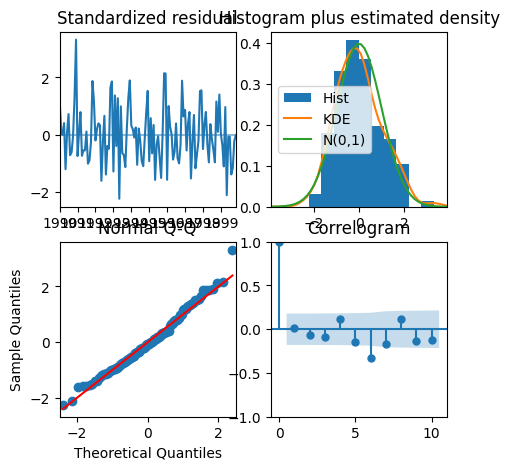

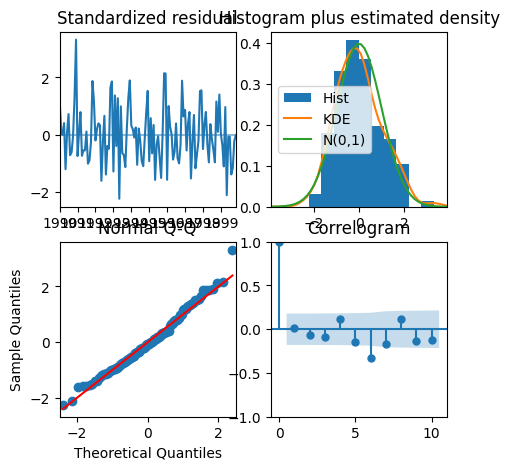

In [89]:
model.plot_diagnostics()

# Seasonal Arima

In [90]:
smodel = pmd.ARIMA((1,0,0),seasonal_order=(1,0,1,12),max_iter=100)

In [91]:
smodel.fit(train)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(1, 0, 0), seasonal_order=(1, 0, 1, 12))

In [92]:
predictions = smodel.predict(n_periods = test.shape[0])

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
mean_absolute_error(test,predictions)

1.5494962621029076

# Time series as Regression of lag values
- Create features from given data
 - lag values / historical values are features used in time series data

In [95]:
df['lag1'] = df['Amount'].shift(1)
df['lag2'] = df['Amount'].shift(2)
df['lag3'] = df['Amount'].shift(3)
df['lag4'] = df['Amount'].shift(4)
df['lag5'] = df['Amount'].shift(5)

In [96]:
df.head()

,Amount,Extract_month,Extract Year,lag1,lag2,lag3,lag4,lag5
Month,,,,,,,,
1990-01-01,16.50,1,1990,NaN,NaN,NaN,NaN,NaN
1990-02-01,15.17,2,1990,16.50,NaN,NaN,NaN,NaN
1990-03-01,12.75,3,1990,15.17,16.50,NaN,NaN,NaN
1990-04-01,12.31,4,1990,12.75,15.17,16.50,NaN,NaN
1990-05-01,8.34,5,1990,12.31,12.75,15.17,16.5,NaN


In [97]:
df.dropna(inplace=True)

In [98]:
df.shape

(127, 8)

In [99]:
df.head()

,Amount,Extract_month,Extract Year,lag1,lag2,lag3,lag4,lag5
Month,,,,,,,,
1990-06-01,8.63,6,1990,8.34,12.31,12.75,15.17,16.50
1990-07-01,12.37,7,1990,8.63,8.34,12.31,12.75,15.17
1990-08-01,11.53,8,1990,12.37,8.63,8.34,12.31,12.75
1990-09-01,9.47,9,1990,11.53,12.37,8.63,8.34,12.31
1990-10-01,9.57,10,1990,9.47,11.53,12.37,8.63,8.34


# X and Y Split

In [104]:
X = df.loc[:,['lag1','lag2','lag3','lag4','lag5']]
y = df.loc[:,'Amount']

In [105]:
X.shape, y.shape

((127, 5), (127,))

In [106]:
test_size = int(0.1 * df.shape[0])
train, test = train_test_split(df['Amount'],test_size = test_size)

# Train Test Split

In [108]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.1,
                                                 random_state=7)

In [112]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((114, 5), (13, 5), (114,), (13,))

# Performing ElasticNet

In [113]:
from sklearn.linear_model import ElasticNet

In [115]:
en = ElasticNet(random_state=7)

In [116]:
en.fit(X_train,y_train)

ElasticNet(random_state=7)

In [117]:
y_pred = en.predict(X_test)

In [118]:
mean_absolute_error(y_test,y_pred)

3.026912026440241

In [125]:
res = pd.DataFrame([y_test.values,y_pred]).T
res.shape

(13, 2)

In [126]:
#res1 = res.T
#res1.shape

In [127]:
res.head()

,0,1
0,18.21,13.913757
1,6.14,10.880929
2,14.75,11.499885
3,11.39,12.365417
4,15.27,10.722085


<Axes: >

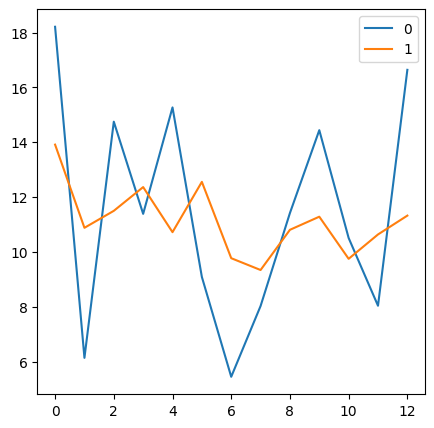

In [128]:
res.plot()